# CCT College

###### Module Title(s):	
Machine Learning for AI
###### Lecturer Name(s):	
David McQuaid
###### Assessment Title:	
ML_CA2
###### Student Name: 
Tamiris Rodrigues Duarte
###### Student Number:
2020294
###### Due Date (Deadline):	
31st May 2024

###### GitHub:	
https://github.com/tamirisrd/ML_CA2

### Neural Networks

You are required to take data stored file “BankRecords.csv”, available on Moodle and process the data into a DataFrame. 
You are then required to train a Neural Network to predict the “Income(Thousands’)” of the customers, including tuning the network to achieve the best results.
You must also compare your neural network to a standard ML regressor of your choosing and discuss your findings in the context of the problem at hand.

### Semantic Analysis

You are required to source text data from any social media platform on any topic that you choose and perform semantic analysis on the text. This analysis should provide a visualization of  the overall sentiment of your text data , showing the positive, neutral, and negative sentiment expressed. You will require at least 1000 text observations.




To perform semantic analysis, I chose the "IMDB dataset", which comprises over 50,000 movie reviews, containing 49,582 reviews categorised into two sentiment classes: positive and negative. Initially, I assessed the dataset for missing values and confirmed that there were none. No further preprocessing was seemed necessary as the dataset appeared to be straightforward.

To facilitate machine learning processes, which typically handle numerical data more efficiently, I created a new column to match sentiment values with numbers, assigning "0" to positive sentiments and "1" to negative sentiments. Subsequently, I plotted these encoded sentiment values to examine the distribution of positive and negative reviews. The resulting plot indicated a balanced distribution between the two sentiment categories. To further validate these findings, I created an additional plot focusing solely on the sentiment labels, corroborating the initial observation of a balanced distribution.

Next, I used the TextBlob tool to perform sentiment analysis on the reviews and assigned new sentiment scores based on the analysis. This redefined the sentiment values, revealing a noticeable variation in the results. The plots show the proportion of positive sentiment reviews increased while the number of negative sentiment reviews decreased. Additionally, the analysis identified a small proportion of reviews as neutral, which was previously not represented in the original categorisation.

The difference accurs because TextBlob is a python library which analysis text. 



> checking missing values 

> add a column to relate the sentiment to a number as ML only reads numbers

> nothing else perfomerd as data has only two columns, no missing values and its pretty straightfoward

> analyse the value column (added to match sentiment) and sentiment 

> sentiment textblob different from sentiment column already existent

> now there's neutral. It's very low, but exists. 

###### Requirements

Perform any preparation of the data (for both the Neural Network and Semantic Analysis data) , that you feel is necessary, using python in your Jupyter notebook. Explain your rationale behind your data preparation and how it will assist you.[0-30]

Create and implement at least 1 Regression algorithm and 1 Neural Network that will output a Prediction of the  “Income(Thousands’)” of the customers. Test these models and try to improve it as you see fit discussing your rationale. Discuss your findings and final rational for choosing a particular Regression algorithm.[0-40]

Make a Prediction of a new customers income, who is not available in the original dataset [0-5]

Perform Sentiment analysis on your text data and discuss your findings in detail. [0-20]

Visualize your sentiment analysis showing the positive, neutral, and negative sentiment expressed[0-5]


# Neural Networks

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3]:
# Set the random seed for reproducibility
seed = 0
np.random.seed(seed)

In [85]:
# Read file
dataset = pd.read_csv("BankRecords.csv")
dataset

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,Masters,0,No,No,No,Yes,No
4996,4997,30,4,15,92037,4,0.4,Diploma,85,No,No,No,Yes,No
4997,4998,63,39,24,93023,2,0.3,Masters,0,No,No,No,No,No
4998,4999,65,40,49,90034,3,0.5,Degree,0,No,No,No,Yes,No


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands's)    5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ 

In [6]:
missing_value = dataset.isnull().sum()
print(missing_value)

ID                       0
Age                      0
Experience(Years)        0
Income(Thousands's)      0
Sort Code                0
Family                   0
Credit Score             0
Education                0
Mortgage(Thousands's)    0
Personal Loan            0
Securities Account       0
CD Account               0
Online Banking           0
CreditCard               0
dtype: int64


In [7]:
# Ordinal Encoding
en_education = ["High School", "Degree", "Diploma", "Masters", "PhD"]
dataset["Education_OriginalEncoded"] = dataset["Education"].apply(lambda x: en_education.index(x))

In [8]:
# Enconding
cat_col = ["Personal Loan", "Securities Account", "CD Account", "Online Banking", "CreditCard"]
oh_en = pd.get_dummies(dataset[cat_col])
dataset = pd.concat([dataset, oh_en], axis=1)

In [9]:
dataset

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,...,Personal Loan_No,Personal Loan_Yes,Securities Account_No,Securities Account_Yes,CD Account_No,CD Account_Yes,Online Banking_No,Online Banking_Yes,CreditCard_No,CreditCard_Yes
0,1,25,1,49,91107,4,1.6,Diploma,0,No,...,True,False,False,True,True,False,True,False,True,False
1,2,45,19,34,90089,3,1.5,Diploma,0,No,...,True,False,False,True,True,False,True,False,True,False
2,3,39,15,11,94720,1,1.0,Diploma,0,No,...,True,False,True,False,True,False,True,False,True,False
3,4,35,9,100,94112,1,2.7,Degree,0,No,...,True,False,True,False,True,False,True,False,True,False
4,5,35,8,45,91330,4,1.0,Degree,0,No,...,True,False,True,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,Masters,0,No,...,True,False,True,False,True,False,False,True,True,False
4996,4997,30,4,15,92037,4,0.4,Diploma,85,No,...,True,False,True,False,True,False,False,True,True,False
4997,4998,63,39,24,93023,2,0.3,Masters,0,No,...,True,False,True,False,True,False,True,False,True,False
4998,4999,65,40,49,90034,3,0.5,Degree,0,No,...,True,False,True,False,True,False,False,True,True,False


In [10]:
# Drop columns after enconding to avoid redudancy
dataset.drop(columns= cat_col, inplace=True)
dataset.drop(columns="Education", inplace=True)

In [11]:
# Encoded column from Boolean to numerical value
encoded_col = [
    'Personal Loan_No', 'Personal Loan_Yes', 'Securities Account_No', 'Securities Account_Yes',
    'CD Account_No', 'CD Account_Yes', 'Online Banking_No', 'Online Banking_Yes',
    'CreditCard_No', 'CreditCard_Yes'
]

dataset[encoded_col] = dataset[encoded_col].astype(int)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         5000 non-null   int64  
 1   Age                        5000 non-null   int64  
 2   Experience(Years)          5000 non-null   int64  
 3   Income(Thousands's)        5000 non-null   int64  
 4   Sort Code                  5000 non-null   int64  
 5   Family                     5000 non-null   int64  
 6   Credit Score               5000 non-null   float64
 7   Mortgage(Thousands's)      5000 non-null   int64  
 8   Education_OriginalEncoded  5000 non-null   int64  
 9   Personal Loan_No           5000 non-null   int32  
 10  Personal Loan_Yes          5000 non-null   int32  
 11  Securities Account_No      5000 non-null   int32  
 12  Securities Account_Yes     5000 non-null   int32  
 13  CD Account_No              5000 non-null   int32

In [13]:
df = dataset.values

In [14]:
df

array([[1.000e+00, 2.500e+01, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.000e+00, 4.500e+01, 1.900e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.000e+00, 3.900e+01, 1.500e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [4.998e+03, 6.300e+01, 3.900e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [4.999e+03, 6.500e+01, 4.000e+01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.000e+03, 2.800e+01, 4.000e+00, ..., 1.000e+00, 0.000e+00,
        1.000e+00]])

In [15]:
# Split data
X = df[:,0:3]
y = df[:,3]

In [16]:
# Standard Scaler
scaler = StandardScaler()
standard_x = scaler.fit_transform(X)

standard_x

array([[-1.73170443, -1.77441684, -1.66607847],
       [-1.73101161, -0.02952359, -0.09633022],
       [-1.73031879, -0.55299157, -0.44516316],
       ...,
       [ 1.73031879,  1.54088033,  1.64783451],
       [ 1.73101161,  1.71536965,  1.73504275],
       [ 1.73170443, -1.51268285, -1.40445376]])

In [17]:
# MinMax Scaler
scaler_minmax = MinMaxScaler()
scaler_x = scaler_minmax.fit_transform(X)

scaler_x

array([[0.00000000e+00, 4.54545455e-02, 8.69565217e-02],
       [2.00040008e-04, 5.00000000e-01, 4.78260870e-01],
       [4.00080016e-04, 3.63636364e-01, 3.91304348e-01],
       ...,
       [9.99599920e-01, 9.09090909e-01, 9.13043478e-01],
       [9.99799960e-01, 9.54545455e-01, 9.34782609e-01],
       [1.00000000e+00, 1.13636364e-01, 1.52173913e-01]])

In [53]:
# Split data into training, validation, and test sets (70%, 15%, 15%)
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(standard_x, y, test_size=0.3)

In [54]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [55]:
print(f"Training data shape: X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"Validation data shape: X_val: {X_val.shape}, Y_val: {Y_val.shape}")
print(f"Test data shape: X_test: {X_test.shape}, Y_test: {Y_test.shape}")

Training data shape: X_train: (3500, 3), Y_train: (3500,)
Validation data shape: X_val: (750, 3), Y_val: (750,)
Test data shape: X_test: (750, 3), Y_test: (750,)


In [56]:
model = Sequential()
model.add(Dense(12, input_shape=(3,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

C:\Users\tahro\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.0000e+00 - loss: 983.9453 - val_accuracy: 0.0000e+00 - val_loss: 463.2478
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: 397.4020 - val_accuracy: 0.0000e+00 - val_loss: 249.2584
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0000e+00 - loss: 39.8174 - val_accuracy: 0.0000e+00 - val_loss: -304.3358
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0000e+00 - loss: -420.8972 - val_accuracy: 0.0000e+00 - val_loss: -698.3010
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0000e+00 - loss: -857.7150 - val_accuracy: 0.0000e+00 - val_loss: -1132.8132
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0000e+00 - loss: -1132.8279 - val_accuracy: 0.0000e+00 - val_loss: -1181.0756
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: -1169.7511 - val_accuracy: 0.0000e+00 - val_loss: -1181.0756


110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -1190.7952 - val_accuracy: 0.0000e+00 - val_loss: -1181.0756
Epoch 47/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -1178.0356 - val_accuracy: 0.0000e+00 - val_loss: -1181.0756
Epoch 48/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: -1154.1322 - val_accuracy: 0.0000e+00 - val_loss: -1181.0756
Epoch 49/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: -1161.3754 - val_accuracy: 0.0000e+00 - val_loss: -1181.0756
Epoch 50/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: -1161.6378 - val_accuracy: 0.0000e+00 - val_loss: -1181.0756
Epoch 51/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: -1160.9945 - val_accuracy: 0.0000e+00 - val_loss: -1181.0756
Epoch 52/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: -1188.2913 - val_accuracy: 0.0000e+00 - val_loss: -1

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: -1172.4003 - val_accuracy: 0.0000e+00 - val_loss: -1181.0756
Epoch 92/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0000e+00 - loss: -1174.8951 - val_accuracy: 0.0000e+00 - val_loss: -1181.0756
Epoch 93/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0000e+00 - loss: -1166.5082 - val_accuracy: 0.0000e+00 - val_loss: -1181.0756
Epoch 94/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: -1165.4867 - val_accuracy: 0.0000e+00 - val_loss: -1181.0756
Epoch 95/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: -1176.7748 - val_accuracy: 0.0000e+00 - val_loss: -1181.0756
Epoch 96/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0000e+00 - loss: -1178.5234 - val_accuracy: 0.0000e+00 - val_loss: -1181.0756
Epoch 97/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0000e+00 - loss: -1129.6338 - val_accuracy: 0.0000e+00 - val_loss: -1

In [59]:
# Evaluate the keras model
scores = model.evaluate(X_test,Y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -1135.6932
compile_metrics: 0.00%


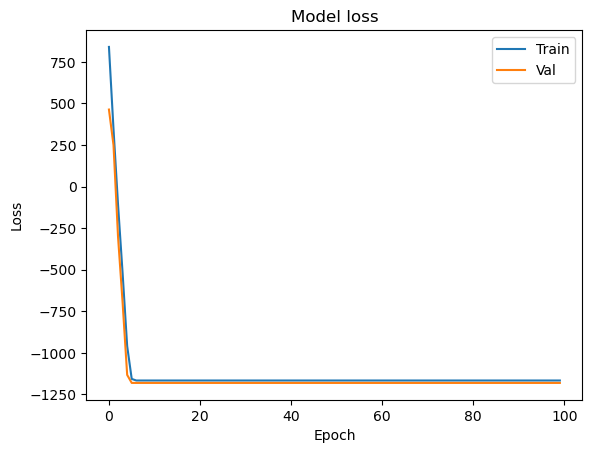

In [60]:
# Plotting the training and validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [61]:
# NN predictions
predictions = model.predict(X_test)
print(predictions)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
[[1.941111 ]
 [2.6753411]
 [1.2988789]
 [1.8840909]
 [2.2034647]
 [3.6867504]
 [3.0329928]
 [2.1123493]
 [2.0117927]
 [1.6531659]
 [1.8536011]
 [1.40281  ]
 [2.4525633]
 [2.3672245]
 [2.451767 ]
 [2.244098 ]
 [1.6584882]
 [2.0796947]
 [2.9020855]
 [2.564018 ]
 [1.2395786]
 [1.3109449]
 [1.3993477]
 [1.6851865]
 [1.8328912]
 [2.5344937]
 [1.6582342]
 [3.1116383]
 [3.1853323]
 [1.375735 ]
 [1.8794814]
 [1.8298726]
 [2.598604 ]
 [2.342364 ]
 [2.0420358]
 [3.56726  ]
 [1.9835321]
 [1.6369649]
 [3.262879 ]
 [1.7494874]
 [2.909693 ]
 [1.8336953]
 [2.016175 ]
 [3.0342042]
 [1.7523559]
 [1.8086476]
 [2.127994 ]
 [1.7077745]
 [2.0363228]
 [1.3102423]
 [1.6300491]
 [2.539268 ]
 [2.1115668]
 [2.2449296]
 [2.177023 ]
 [1.9631208]
 [2.3926253]
 [1.8357391]
 [2.0536616]
 [3.777942 ]
 [1.88295  ]
 [1.6948725]
 [1.5655035]
 [1.2241596]
 [1.9014173]
 [1.4178058]
 [2.08073  ]
 [1.3262388]
 [2.076346 ]
 [1.3594928]
 [2.2783284]
 [1.7916063]
 [1.9184357]
 [3.1421323]

In [62]:
# Mean Square Value and R2 NN values
nn_mse = mean_squared_error(Y_test, predictions)
nn_r2 = r2_score(Y_test, predictions)
print("Neural Network - MSE: %.2f, R2: %.2f" % (nn_mse, nn_r2))

Neural Network - MSE: 6714.72, R2: -2.28


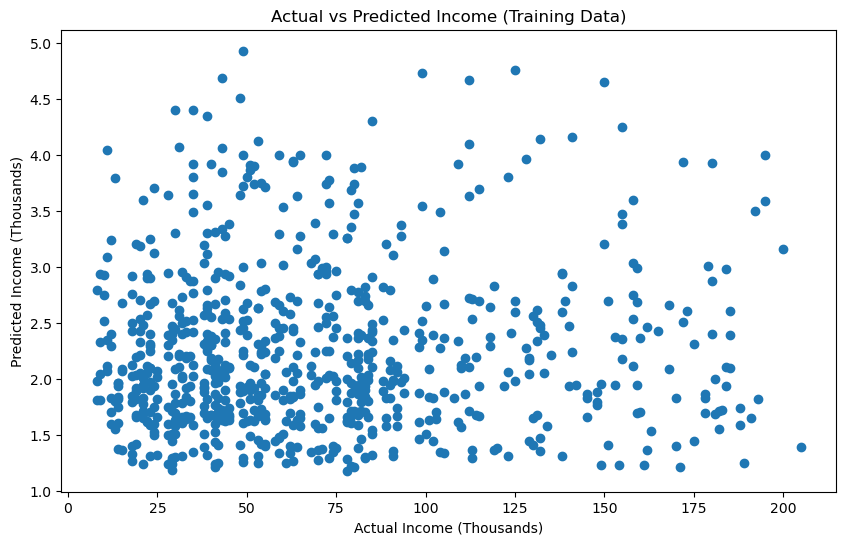

In [64]:
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, predictions)
plt.xlabel('Actual Income (Thousands)')
plt.ylabel('Predicted Income (Thousands)')
plt.title('Actual vs Predicted Income (Training Data)')
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression

## Linear Regression

In [65]:
model_lr = LinearRegression()

In [66]:
# Fit LR model
model_lr.fit(X_train,Y_train)

LinearRegression()

In [67]:
lr_predictions = model_lr.predict(X_test)
lr_mse = mean_squared_error(Y_test, lr_predictions)
lr_r2 = r2_score(Y_test, lr_predictions)

print("Linear Regression - MSE: %.2f, R2: %.2f" % (lr_mse, lr_r2))

Linear Regression - MSE: 2023.60, R2: 0.01


In [68]:
# Comparative Neural Network vs Linear Regression
print("Neural Network vs Linear Regression:")
print("MSE - NN: %.2f, LR: %.2f" % (nn_mse, lr_mse))
print("R2 - NN: %.2f, LR: %.2f" % (nn_r2, lr_r2))

Neural Network vs Linear Regression:
MSE - NN: 6714.72, LR: 2023.60
R2 - NN: -2.28, LR: 0.01


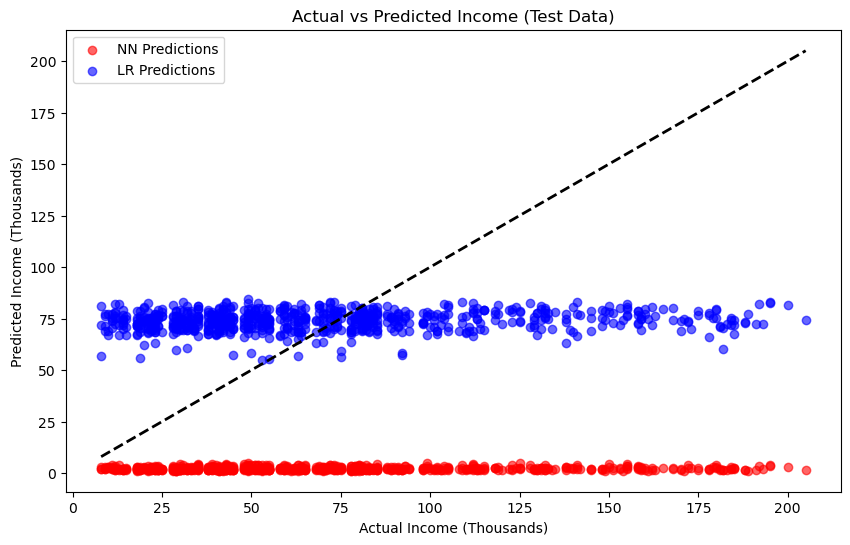

In [69]:
# Plotting Neural Network vs Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, predictions, alpha=0.6, color='r', label='NN Predictions')
plt.scatter(Y_test, lr_predictions, alpha=0.6, color='b', label='LR Predictions')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Income (Thousands)')
plt.ylabel('Predicted Income (Thousands)')
plt.title('Actual vs Predicted Income (Test Data)')
plt.legend()
plt.show()

## New Customer

In [110]:
# Define the new customer's data
new_customer = pd.DataFrame({
    "ID": [5001.0],
    "Age": [45],
    "Experience(Years)": [20],
    "Income(Thousands's)": [37],
    "Sort Code": [74634],
    "Family": [3],
    "Credit Score": [7.5],
    "Mortgage(Thousands's)": [5],
    "Education_OriginalEncoded": [2],
    "Personal Loan_No": [1],
    "Personal Loan_Yes": [0],
    "Securities Account_No": [0],
    "Securities Account_Yes": [1],
    "CD Account_No": [1],
    "CD Account_Yes": [0],
    "Online Banking_No": [0],
    "Online Banking_Yes": [1],
    "CreditCard_No": [1],
    "CreditCard_Yes": [0]
})

# Select the same features used for training
new_customer_features = new_customer[["Age", "Experience(Years)", "Sort Code"]]

In [112]:
# Standardise the new customer's data
new_customer_scaled = scaler.fit_transform(new_customer_features)

In [113]:
# Predict using NN and LR models
nn_prediction = model.predict(new_customer_scaled)
lr_prediction = model_lr.predict(new_customer_scaled)
print("NN Prediction:", nn_prediction)
print("LR Prediction:", lr_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
NN Prediction: [[1.5209231]]
LR Prediction: [74.1028411]


# Semantic Analysis

In [39]:
# Read file
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [41]:
# Checking missing values
missing_value = df.isnull().sum()
print(missing_value)

review       0
sentiment    0
dtype: int64


In [42]:
# Add column enumerating sentiment
df["value"] = df["sentiment"].apply(lambda x: 0 if x == "positive" else(1 if x == "negative" else None))

df.head()

,review,sentiment,value
0,One of the other reviewers has mentioned that ...,positive,0
1,A wonderful little production. <br /><br />The...,positive,0
2,I thought this was a wonderful way to spend ti...,positive,0
3,Basically there's a family where a little boy ...,negative,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,0


<Axes: xlabel='value', ylabel='count'>

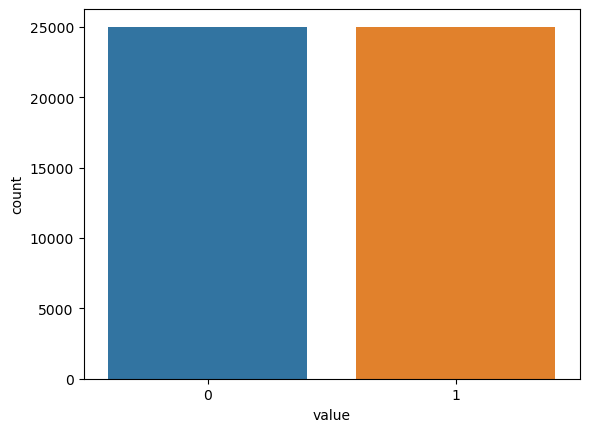

In [43]:
sns.countplot(x="value", data=df)

<Axes: xlabel='sentiment', ylabel='count'>

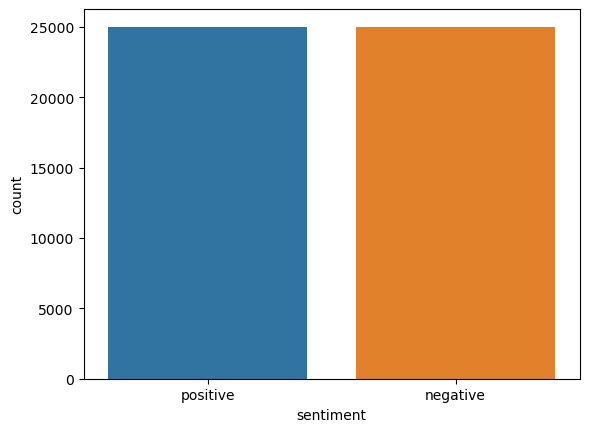

In [44]:
sns.countplot(x="sentiment", data=df)

In [45]:
from textblob import TextBlob

In [46]:
df["sentiment_score"]= df["review"].apply(lambda x:TextBlob(x).sentiment[0])

In [47]:
df["sentiment_score_textblob"] = df["sentiment_score"].apply(lambda x: "positive" if x > 0 else("neutral" if x == 0 else "negative"))

In [48]:
df

,review,sentiment,value,sentiment_score,sentiment_score_textblob
0,One of the other reviewers has mentioned that ...,positive,0,0.023433,positive
1,A wonderful little production. <br /><br />The...,positive,0,0.109722,positive
2,I thought this was a wonderful way to spend ti...,positive,0,0.354008,positive
3,Basically there's a family where a little boy ...,negative,1,-0.057813,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,0,0.217952,positive
...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,0,0.394425,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,1,-0.276190,negative
49997,I am a Catholic taught in parochial elementary...,negative,1,0.056984,positive
49998,I'm going to have to disagree with the previou...,negative,1,-0.048663,negative


<Axes: xlabel='sentiment_score_textblob', ylabel='count'>

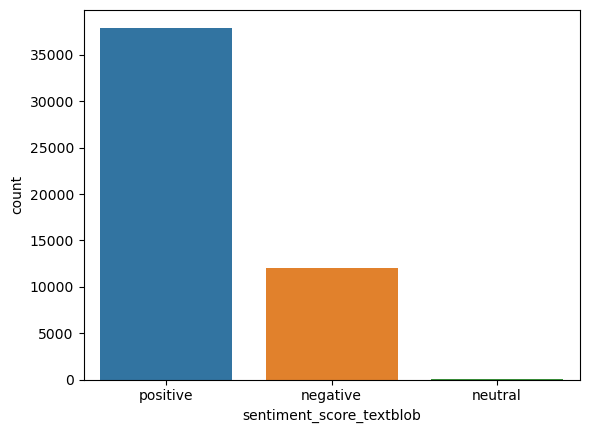

In [105]:
sns.countplot(x="sentiment_score_textblob", data=df)


# References
https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Tutorial used in class 13/05

https://realpython.com/python-ai-neural-network/

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

Tutorial used in class 29/04

https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/

https://textblob.readthedocs.io/en/dev/